<a href="https://colab.research.google.com/github/shininglight99/Danna-archive/blob/master/Correlation_BW_Fx_D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [67]:
!pip install -q finance-datareader

In [68]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
plt.rcParams["figure.figsize"] = (14,8)
plt.rcParams['font.size'] = 16
plt.rcParams['lines.linewidth'] = 2
plt.rcParams["axes.grid"] = True
plt.rcParams['axes.axisbelow'] = True

In [69]:
import FinanceDataReader as fdr
usdkrw = fdr.DataReader('USD/KRW', '2020-01-01') 
usdeur = fdr.DataReader('USD/EUR', '2020-01-01') 
usdcnh = fdr.DataReader('USD/CNH', '2020-01-01')
usdjpy = fdr.DataReader('USD/JPY', '2020-01-01')
usdaud = fdr.DataReader('USD/AUD', '2020-01-01')

In [70]:
df_plot = pd.DataFrame()

df_plot['KRW'] = usdkrw['Close']
df_plot['EUR'] = usdeur['Close']
df_plot['CNH'] = usdcnh['Close']
df_plot['JPY'] = usdjpy['Close']
df_plot['AUD'] = usdaud['Close']


In [71]:
df_plot.tail()

,KRW,EUR,CNH,JPY,AUD
Date,,,,,
2021-09-15,1166.23,0.8461,6.4251,109.36,1.3631
2021-09-16,1175.19,0.8498,6.4517,109.70,1.3716
2021-09-17,1180.69,0.8526,6.4717,109.96,1.3761
2021-09-20,1185.67,0.8526,6.4810,109.39,1.3784
2021-09-21,1185.25,0.8530,6.4787,109.66,1.3754


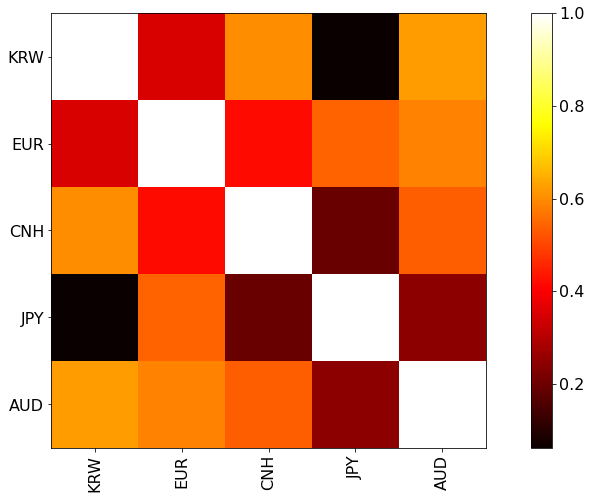

In [72]:
changes = df_plot.pct_change()
corr = changes.corr()

plt.figure(figsize=(16,8))
plt.grid(False)
plt.imshow(corr, cmap='hot', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns, rotation=90)
plt.yticks(range(len(corr)), corr.columns)
plt.show()

In [73]:
idx, vals = [], []
for ix, i in enumerate(corr.columns.values):
    for j in corr.columns.values[ix + 1:]:
        idx.append((i, j))
        vals.append(corr[i][j])

ser = pd.Series(data=vals, index=idx)
ser_ord = ser.sort_values(ascending=False)
ser_ord[:10]

(KRW, AUD)    0.624277
(KRW, CNH)    0.601757
(EUR, AUD)    0.587663
(EUR, JPY)    0.544269
(CNH, AUD)    0.535810
(EUR, CNH)    0.418841
(KRW, EUR)    0.355173
(JPY, AUD)    0.245658
(CNH, JPY)    0.195479
(KRW, JPY)    0.062225
dtype: float64

In [74]:
corr['KRW'].sort_values(ascending=False)

KRW    1.000000
AUD    0.624277
CNH    0.601757
EUR    0.355173
JPY    0.062225
Name: KRW, dtype: float64

In [75]:
corr['CNH'].sort_values(ascending=False)

CNH    1.000000
KRW    0.601757
AUD    0.535810
EUR    0.418841
JPY    0.195479
Name: CNH, dtype: float64

In [76]:
corr['EUR'].sort_values(ascending=False)

EUR    1.000000
AUD    0.587663
JPY    0.544269
CNH    0.418841
KRW    0.355173
Name: EUR, dtype: float64

In [59]:
corr['AUD'].sort_values(ascending=False)

AUD    1.000000
KRW    0.624266
EUR    0.587699
CNH    0.535832
JPY    0.245720
Name: AUD, dtype: float64

In [60]:
corr['JPY'].sort_values(ascending=False)

JPY    1.000000
EUR    0.544256
AUD    0.245720
CNH    0.195456
KRW    0.062265
Name: JPY, dtype: float64

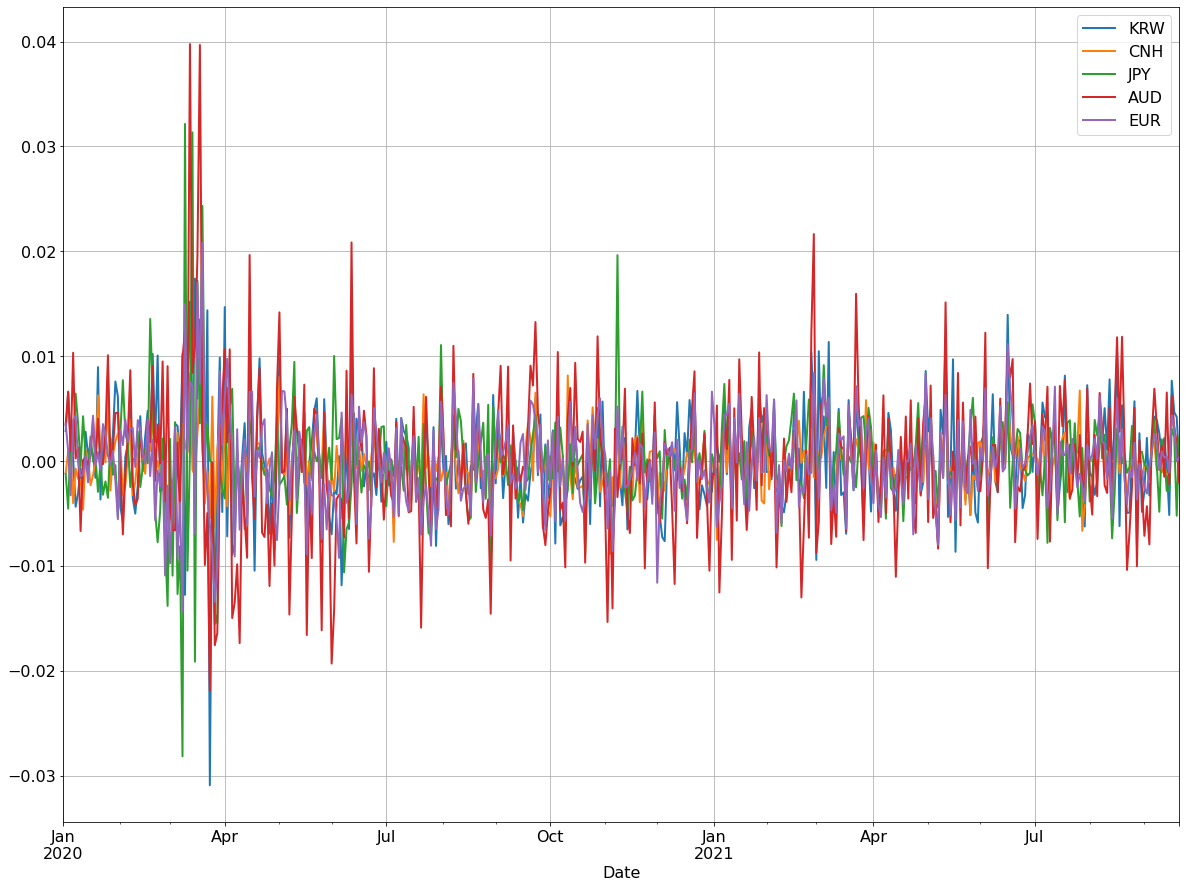

In [66]:
plt.figure(figsize=(20,15))
changes['KRW'].plot()
changes['CNH'].plot()
changes['JPY'].plot()
changes['AUD'].plot()
changes['EUR'].plot()
plt.legend()